In [1]:
import pandas as pd 
from datetime import datetime
import numpy as np 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score

In [2]:
lr = LinearRegression()

In [3]:
alc = pd.read_csv('alc.csv')
alc

,DD (grados),HR (% H.R.),Hour,Month,NO (µg/m³N),NO2 (µg/m³N),NOX (µg/m³N),O3 (µg/m³N),PM10 (µg/m³N),RS (W/m³),...,NOX_lag1,PM10_lag1,O3_lag1,NO_lag2,NO2_lag2,NOX_lag2,PM10_lag2,O3_lag2,SO2_lag1,SO2_lag2
0,237.0,79.8,0,5.164541e-02,8.0,54.0,66.0,18.0,14.0,1.0,...,92.0,10.0,10.0,19.0,70.0,98.0,28.0,11.0,4.0,4.0
1,233.0,67.0,1,5.379729e-02,3.0,29.0,33.0,38.0,10.0,1.0,...,66.0,14.0,18.0,18.0,64.0,92.0,10.0,10.0,4.0,4.0
2,300.0,64.6,2,5.594916e-02,4.0,27.0,33.0,34.0,8.0,1.0,...,33.0,10.0,38.0,8.0,54.0,66.0,14.0,18.0,4.0,4.0
3,266.0,63.8,3,5.810104e-02,4.0,19.0,25.0,38.0,7.0,1.0,...,33.0,8.0,34.0,3.0,29.0,33.0,10.0,38.0,3.0,4.0
4,339.0,58.4,4,6.025291e-02,4.0,18.0,24.0,47.0,10.0,1.0,...,25.0,7.0,38.0,4.0,27.0,33.0,8.0,34.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17491,335.0,76.0,19,8.607594e-03,15.0,49.0,72.0,4.0,40.0,2.0,...,36.0,32.0,31.0,3.0,18.0,22.0,26.0,49.0,1.0,1.0
17492,282.0,81.0,20,6.455696e-03,39.0,56.0,115.0,3.0,50.0,1.0,...,72.0,40.0,4.0,3.0,31.0,36.0,32.0,31.0,1.0,1.0
17493,320.0,85.0,21,4.303797e-03,84.0,63.0,191.0,2.0,43.0,2.0,...,115.0,50.0,3.0,15.0,49.0,72.0,40.0,4.0,1.0,1.0
17494,148.0,87.0,22,2.151899e-03,80.0,57.0,180.0,2.0,41.0,1.0,...,191.0,43.0,2.0,39.0,56.0,115.0,50.0,3.0,2.0,1.0


In [5]:
x = alc[['NOX (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour']]
y = alc[['NO (µg/m³N)']]

In [6]:
x_train = x[5000:]
y_train = y[5000:]
x_test = x[:5000]
y_test = y[:5000]

In [7]:
lr.fit(x_train,y_train)      

LinearRegression()

In [8]:
y_pred = lr.predict(x_test)
y_pred

array([[3.27193027],
       [2.64259049],
       [3.96618478],
       ...,
       [1.97761564],
       [1.33305554],
       [1.95143759]])

In [9]:
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
score = lr.score(x,y)
acc = lr.score(x_test,y_test)
print('R-squared:',score,'\n','RMSE: ',rmse,'\n','Accuracy: ',acc)

R-squared: 0.9995707927379023 
 RMSE:  0.4371902889254326 
 Accuracy:  0.999215784067271


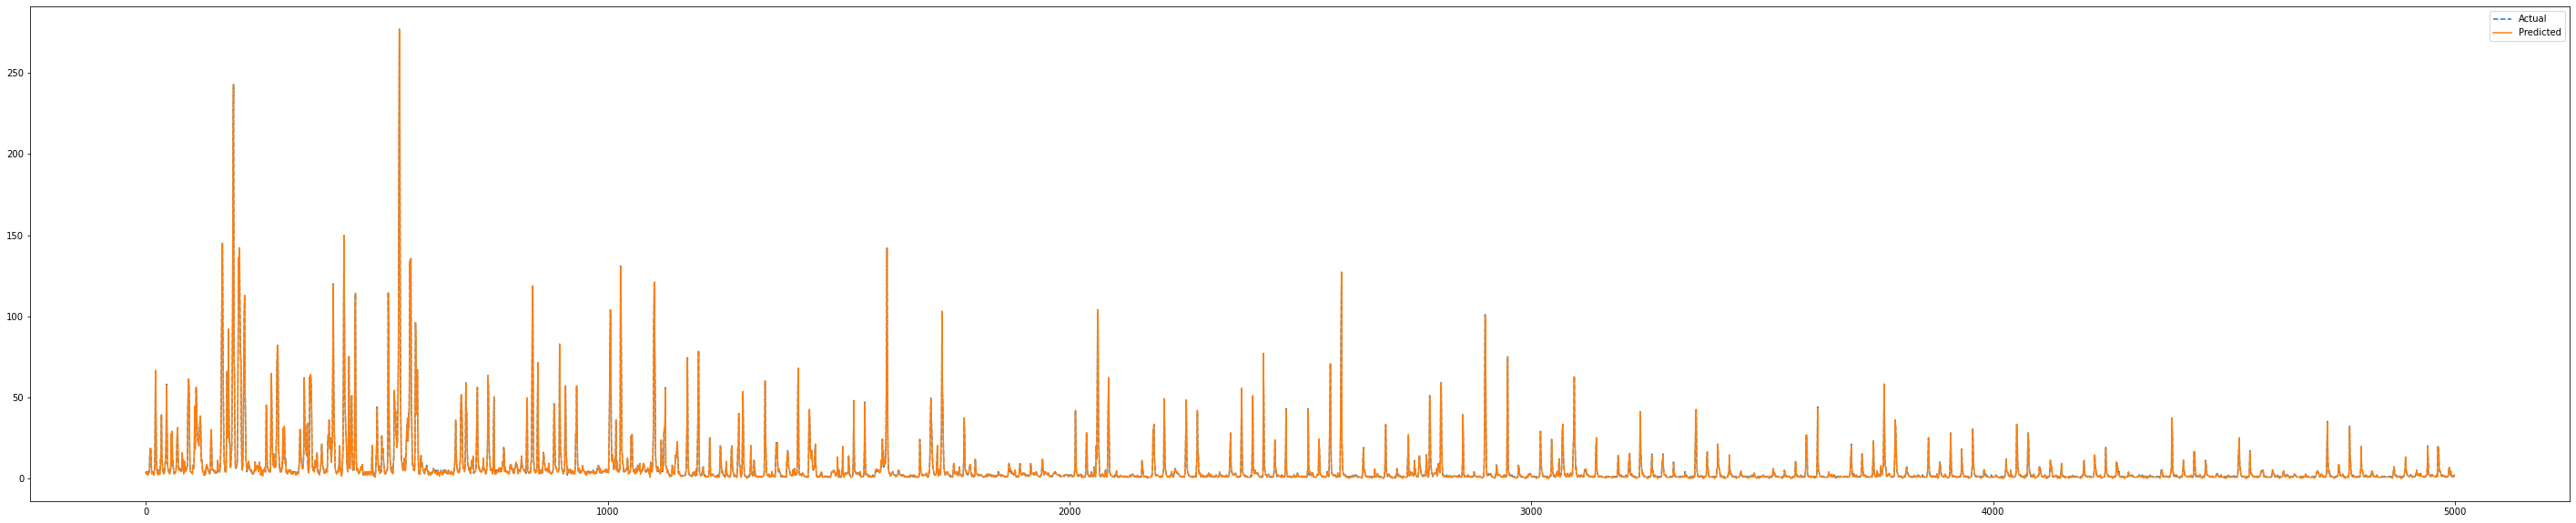

In [10]:
plt.figure(figsize=(50,10))
plt.plot(np.array(y_test),'--')
plt.plot(y_pred)
plt.legend(['Actual','Predicted'])

In [11]:
list_x = [['NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','Month','Hour']]
list_y = ['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','PM10 (µg/m³N)']
for i in np.arange(0,6):
    x = alc[list_x[i]]
    y = alc[[list_y[i]]]
    x_train = x[5000:]
    y_train = y[5000:]
    x_test = x[:5000]
    y_test = y[:5000]
    lr.fit(x_train,y_train)  
    y_pred = lr.predict(x_test)
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    score = lr.score(x,y)
    print(list_y[i],'\n R-squared:',score,'\n','RMSE: ',rmse)

NOX (µg/m³N) 
 R-squared: 0.9997873468983993 
 RMSE:  0.6713276720781816
NO (µg/m³N) 
 R-squared: 0.9995707927379023 
 RMSE:  0.4371902889254326
NO2 (µg/m³N) 
 R-squared: 0.9986346207612575 
 RMSE:  0.6813332881898606
SO2 (µg/m³N) 
 R-squared: 0.26966826365065844 
 RMSE:  1.3417494837814183
O3 (µg/m³N) 
 R-squared: 0.7884507603641558 
 RMSE:  21.30818817726286
PM10 (µg/m³N) 
 R-squared: 0.394555909236017 
 RMSE:  10.910938433609182


# Time Series

In [3]:
alc = pd.read_csv('alc.csv')
alc

,DD (grados),HR (% H.R.),Hour,Month,NO (µg/m³N),NO2 (µg/m³N),NOX (µg/m³N),O3 (µg/m³N),PM10 (µg/m³N),RS (W/m³),...,NO_lag1,NO2_lag1,NOX_lag1,PM10_lag1,O3_lag1,NO_lag2,NO2_lag2,NOX_lag2,PM10_lag2,O3_lag2
0,237.0,79.8,0,5.164541e-02,8.0,54.0,66.0,18.0,14.0,1.0,...,18.0,64.0,92.0,10.0,10.0,19.0,70.0,98.0,28.0,11.0
1,233.0,67.0,1,5.379729e-02,3.0,29.0,33.0,38.0,10.0,1.0,...,8.0,54.0,66.0,14.0,18.0,18.0,64.0,92.0,10.0,10.0
2,300.0,64.6,2,5.594916e-02,4.0,27.0,33.0,34.0,8.0,1.0,...,3.0,29.0,33.0,10.0,38.0,8.0,54.0,66.0,14.0,18.0
3,266.0,63.8,3,5.810104e-02,4.0,19.0,25.0,38.0,7.0,1.0,...,4.0,27.0,33.0,8.0,34.0,3.0,29.0,33.0,10.0,38.0
4,339.0,58.4,4,6.025291e-02,4.0,18.0,24.0,47.0,10.0,1.0,...,4.0,19.0,25.0,7.0,38.0,4.0,27.0,33.0,8.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17491,335.0,76.0,19,8.607594e-03,15.0,49.0,72.0,4.0,40.0,2.0,...,3.0,31.0,36.0,32.0,31.0,3.0,18.0,22.0,26.0,49.0
17492,282.0,81.0,20,6.455696e-03,39.0,56.0,115.0,3.0,50.0,1.0,...,15.0,49.0,72.0,40.0,4.0,3.0,31.0,36.0,32.0,31.0
17493,320.0,85.0,21,4.303797e-03,84.0,63.0,191.0,2.0,43.0,2.0,...,39.0,56.0,115.0,50.0,3.0,15.0,49.0,72.0,40.0,4.0
17494,148.0,87.0,22,2.151899e-03,80.0,57.0,180.0,2.0,41.0,1.0,...,84.0,63.0,191.0,43.0,2.0,39.0,56.0,115.0,50.0,3.0


In [4]:
#list_x = [['NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','Month','Hour']]
#list_y = ['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','PM10 (µg/m³N)']
list_x = ['DD (grados)', 'HR (% H.R.)', 'Hour', 'Month', 'RS (W/m³)', 'TMP (ºC)', 'VV (m/s)', 'NO_roll_mean', 'NO2_roll_mean', 'NOX_roll_mean', 'PM10_roll_mean', 'O3_roll_mean', 'NO_lag1', 'NO2_lag1', 'NOX_lag1', 'PM10_lag1', 'O3_lag1', 'NO_lag2', 'NO2_lag2', 'NOX_lag2', 'PM10_lag2', 'O3_lag2','SO2_roll_mean','SO2_lag1','SO2_lag2']
list_y = ['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','PM10 (µg/m³N)']
for i in np.arange(0,6):
    x = alc[list_x]
    y = alc[[list_y[i]]]
    x_train = x[5000:]
    y_train = y[5000:]
    x_test = x[:5000]
    y_test = y[:5000]
    lr.fit(x_train,y_train)  
    y_pred = lr.predict(x_test)
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    score = lr.score(x_test,y_test)
    print(list_y[i],'\n R-squared:',score,'\n','RMSE: ',rmse)

NOX (µg/m³N) 
 R-squared: 0.7285381088394816 
 RMSE:  19.17487298781859
NO (µg/m³N) 
 R-squared: 0.6540498211196217 
 RMSE:  9.181927202216308
NO2 (µg/m³N) 
 R-squared: 0.7809071818907504 
 RMSE:  7.915034540195357
SO2 (µg/m³N) 
 R-squared: 0.6653308964155786 
 RMSE:  0.7904798553172576
O3 (µg/m³N) 
 R-squared: 0.9140522830260635 
 RMSE:  9.822643425710968
PM10 (µg/m³N) 
 R-squared: 0.6469647333788411 
 RMSE:  7.645842112369012
